# <center>HDR - High Dynamic Range</center>

### This article presents a sample usage of Richard Debevec's HDR algorithm using OpenCV's implementation.

### Import the required Python libraries.

In [7]:
import numpy as np
import cv2
import os
import threading
import matplotlib.pyplot as plt

### The images are stored in different scene folders. Thus, this function walks through the given scene folder and loads all the images in that folder. 

In [23]:
def load_images(scene_path:str):
    '''
    Traverse the scene_path directory and load all the images in it.
    '''
    images = []
    for subdir, dirs, files in os.walk(scene_path):
        for file in files:
            relative_path = os.path.join(subdir, file)
            image = cv2.imread(relative_path)
            images.append(image)
    return images

In [24]:
def show_image_matplotlib(image:np.ndarray, size:tuple = (512, 512)):
    '''
    Show an image using matplotlib. A conversion from BGR is needed because Matplotlib
    expects images to be in RGB format.
    '''
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [26]:
def show_image_cv2(image:np.ndarray):
    cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
    cv2.imshow("Image", image) 
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [27]:
def show_images_cv2(images:list):
    '''
    For listing the images using OpenCV in a concurrent manner, multithreading is needed.
    '''
    for image in images:
        thread = threading.Thread(target = show_image_cv2, args=(image,))
        thread.start()

### The HDR algorithm steps.
#### Remove ghosting be aligning the images. This step is optional. In the function, the parameter *should_align* is a boolean for deciding whether images alignment is needed or not. If the images were taken using a tripod, then there would be no need of alignment.

#### Recover the camera response function (CRF) using the images and their exposure times.

#### Having the CRF determined, use the images, exposure times and the CRF (earlier determined) to merge the images in a HDR one.

In [19]:
def construct_hdr_image(images, exposure_times, should_align):
    if should_align:
        alignMTB = cv2.createAlignMTB()
        alignMTB.process(images, images)
        print('After aligning.')
        [show_image_matplotlib(image) for image in images]
    
    crf_calibrator = cv2.createCalibrateDebevec()
    camera_response = crf_calibrator.process(images, exposure_times)
    
    merge_process = cv2.createMergeDebevec()
    hdr_image = merge_process.process(images, exposure_times, camera_response)
    return hdr_image

### Load the images from a certain folder, initialize the exposure times.

In [37]:
images = load_images('../data/scene_3/')
#times = np.float32([1/33, 1/33, 1/50])
#times = np.array([1/506, 1/100, 1/2151], dtype = np.float32)
times = np.array([ 1/30.0, 0.25, 2.5, 15.0 ], dtype=np.float32)

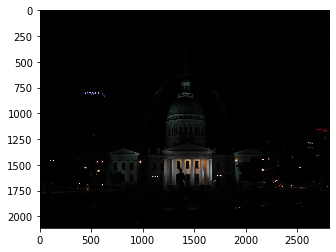

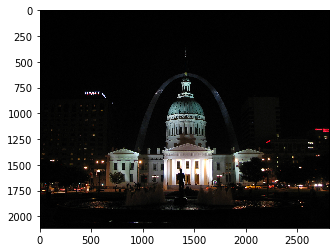

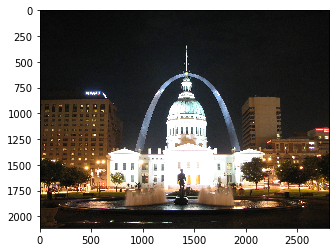

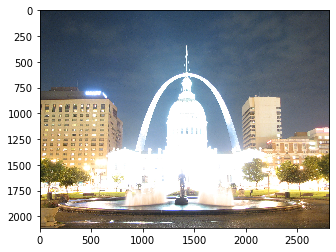

[None, None, None, None]

In [38]:
[show_image_matplotlib(image) for image in images]

After aligning.


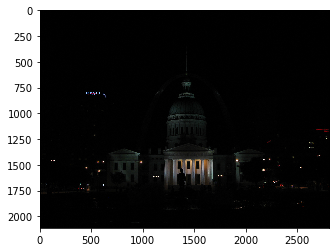

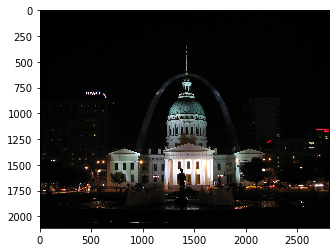

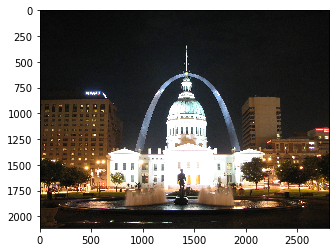

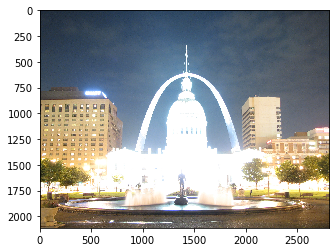

In [39]:
hdr_image = construct_hdr_image(images, times, True)

### HDR images can't be displayed on normal displays due to the fact that their pixel values can have more than 256 values. Thus, they have to be tonemapped so that they can be displayed by 1-byte per channel displays. Tonemapping is the process that changes the pixel values of the HDR images so that they will fit in the range of a 1 byte per channel image.

#### There are several tonemapping algorithms.

#### Drago's tonemapping algorithm. 
##### Drago's method parameters are:
-    gamma 
-  saturation
-   bias 

When saving the file to the disk, a multiplication to 255 is necessary because tonemapping algorithms produce pixels with values in the [0, 1] range.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


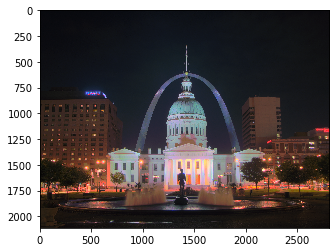

True

In [40]:
drago_tonemap = cv2.createTonemapDrago(1.0, 0.7)
drago_ldr = drago_tonemap.process(hdr_image)
drago_ldr =  2.76 * drago_ldr
show_image_matplotlib(drago_ldr)
cv2.imwrite("drago_ldr.jpg", drago_ldr * 255)

#### Reinhard's tonemapping algorithm.
##### Reinhard's method parameters are:
-    gamma 
-  intensity
-   light_adapt
- color_adapt

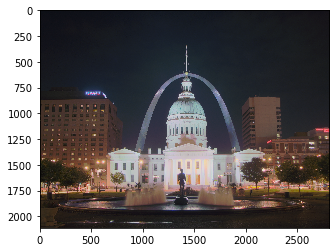

True

In [41]:
reinhard_tonemap = cv2.createTonemapReinhard(1.5, 0.1 , 0.25, 0)
reinhard_ldr = reinhard_tonemap.process(hdr_image)
show_image_matplotlib(reinhard_ldr)
cv2.imwrite("reinhard_ldr.jpg", reinhard_ldr * 255)

#### Mantiuk's tonemapping algorithm.
##### Mantiuk's method parameters are:
-    gamma 
-  scale 
-   saturation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


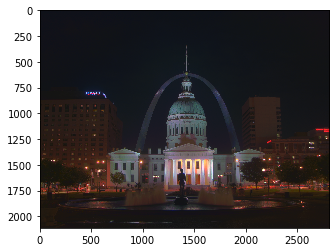

True

In [42]:
mantiuk_tonemap = cv2.createTonemapMantiuk(2.2,0.9, 1.5)
mantiuk_ldr = mantiuk_tonemap.process(hdr_image)
mantiuk_ldr = 2.85 * mantiuk_ldr
show_image_matplotlib(mantiuk_ldr)
cv2.imwrite("ldr-Mantiuk.jpg", mantiuk_ldr * 255)

### Apply the same steps on another scene

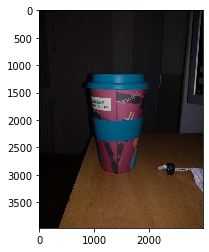

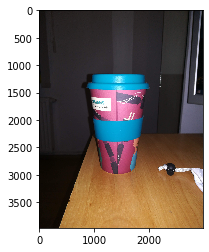

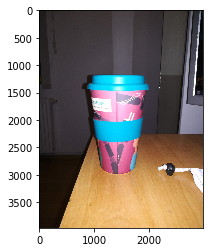

After aligning.


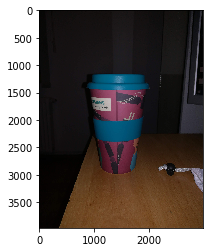

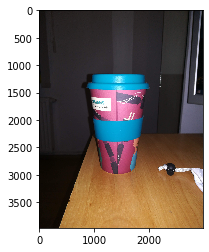

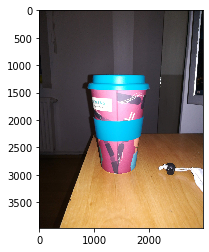

In [45]:
images = load_images('../data/scene_1/')
times = np.float32([1/50, 1/33, 1/33])

[show_image_matplotlib(image) for image in images]
hdr_image = construct_hdr_image(images, times, True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


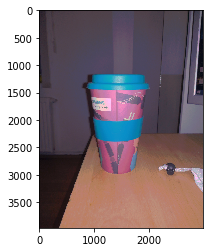

True

In [46]:
drago_tonemap = cv2.createTonemapDrago(0.65, 0.65)
drago_ldr = drago_tonemap.process(hdr_image)
drago_ldr =  1.1 * drago_ldr
show_image_matplotlib(drago_ldr)
cv2.imwrite("drago_ldr.jpg", drago_ldr * 255)

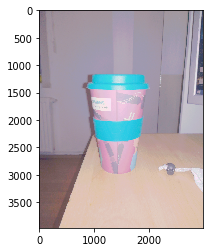

True

In [47]:
reinhard_tonemap = cv2.createTonemapReinhard(1.5, 0.1 , 0.25, 0)
reinhard_ldr = reinhard_tonemap.process(hdr_image)
show_image_matplotlib(reinhard_ldr)
cv2.imwrite("reinhard_ldr.jpg", reinhard_ldr * 255)

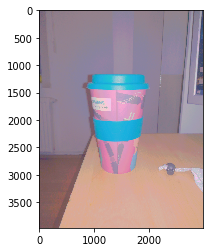

True

In [48]:
mantiuk_tonemap = cv2.createTonemapMantiuk(2.2,0.9, 1.5)
mantiuk_ldr = mantiuk_tonemap.process(hdr_image)
mantiuk_ldr =   mantiuk_ldr
show_image_matplotlib(mantiuk_ldr)
cv2.imwrite("ldr-Mantiuk.jpg", mantiuk_ldr * 255)